In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [2]:
df_adult = pd.read_csv("AdultCensus_crowdsourcing_data.csv")
df_compas = pd.read_csv("COMPAS_crowdsourcing_data.csv")
df_adult.head()
df_compas.head()

,example_idx,age_category,age,crime_level,num_of_crimes,stay_in_prison,gender,race,true_label,ans_1,...,worker_id_2,worker_id_3,worker_id_4,worker_id_5,worker_id_6,worker_id_7,worker_id_8,worker_id_9,worker_id_10,worker_id_11
0,0,Less than 25,23,Felony (Serious),8,> 3 months,Male,Non-caucasian,1,4,...,worker_60,worker_114,worker_104,worker_17,worker_48,worker_31,worker_74,worker_133,worker_14,worker_75
1,1,Greater than 45,52,Misdemeanor (Light),0,< week,Male,Non-caucasian,1,2,...,worker_19,worker_113,worker_109,worker_106,worker_115,worker_25,worker_126,worker_44,worker_132,worker_45
2,2,25 to 45,31,Felony (Serious),3,< week,Male,Non-caucasian,1,2,...,worker_44,worker_61,worker_62,worker_112,worker_40,worker_51,worker_92,worker_101,worker_7,worker_133
3,3,25 to 45,29,Felony (Serious),7,< week,Male,Non-caucasian,1,3,...,worker_133,worker_83,worker_50,worker_139,worker_96,worker_41,worker_20,worker_55,worker_8,worker_44
4,4,25 to 45,27,Felony (Serious),5,< 3 months,Male,Non-caucasian,1,3,...,worker_135,worker_47,worker_103,worker_57,worker_53,worker_42,worker_133,worker_24,worker_30,worker_124


In [3]:
columns_adult = list(df_adult.columns)
columns_compas = list(df_compas.columns)


print("AdultCencus dataset columns: ",columns_adult)
print("Compas dataset columns: ",columns_compas)

AdultCencus dataset columns:  ['example_idx', 'age', 'work_class', 'education', 'education_num', 'marital_status', 'occupation', 'role_in_family', 'capital_gain', 'work_hours_per_week', 'gender', 'race', 'true_label', 'ans_1', 'ans_2', 'ans_3', 'ans_4', 'ans_5', 'ans_6', 'ans_7', 'ans_8', 'ans_9', 'ans_10', 'ans_11', 'worker_id_1', 'worker_id_2', 'worker_id_3', 'worker_id_4', 'worker_id_5', 'worker_id_6', 'worker_id_7', 'worker_id_8', 'worker_id_9', 'worker_id_10', 'worker_id_11']
Compas dataset columns:  ['example_idx', 'age_category', 'age', 'crime_level', 'num_of_crimes', 'stay_in_prison', 'gender', 'race', 'true_label', 'ans_1', 'ans_2', 'ans_3', 'ans_4', 'ans_5', 'ans_6', 'ans_7', 'ans_8', 'ans_9', 'ans_10', 'ans_11', 'worker_id_1', 'worker_id_2', 'worker_id_3', 'worker_id_4', 'worker_id_5', 'worker_id_6', 'worker_id_7', 'worker_id_8', 'worker_id_9', 'worker_id_10', 'worker_id_11']


In [4]:
df_adult.true_label.unique()
df_compas.true_label.unique()

array([ 1, -1])

In [5]:
print("Number of samples of COMPAS dataset: ", len(df_compas))
print("Number of samples of AdultCencus dataset: ", len(df_compas))


Number of samples of COMPAS dataset:  440
Number of samples of AdultCencus dataset:  440


## COMPAS crowdsourcing dataset

In [12]:
# There seems to not have significant imbalance in target classes 
target_counts = df_compas["true_label"].value_counts()
target_counts

-1    228
 1    212
Name: true_label, dtype: int64

In [13]:
df_compas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   example_idx     440 non-null    int64 
 1   age_category    440 non-null    object
 2   age             440 non-null    int64 
 3   crime_level     440 non-null    object
 4   num_of_crimes   440 non-null    int64 
 5   stay_in_prison  440 non-null    object
 6   gender          440 non-null    object
 7   race            440 non-null    object
 8   true_label      440 non-null    int64 
 9   ans_1           440 non-null    int64 
 10  ans_2           440 non-null    int64 
 11  ans_3           440 non-null    int64 
 12  ans_4           440 non-null    int64 
 13  ans_5           440 non-null    int64 
 14  ans_6           440 non-null    int64 
 15  ans_7           440 non-null    int64 
 16  ans_8           440 non-null    int64 
 17  ans_9           440 non-null    int64 
 18  ans_10    

In [6]:
# Clean data

cat_feat = df_compas.select_dtypes("O").columns.tolist() # categorial data

num_feat = df_compas.columns.difference(cat_feat+["Survived"]).tolist() # numeric data

print("categorical data:")
display(df_compas[cat_feat].head(2))


print("numeric data:")
display(df_compas[num_feat].head(2))


categorical data:


,age_category,crime_level,stay_in_prison,gender,race,worker_id_1,worker_id_2,worker_id_3,worker_id_4,worker_id_5,worker_id_6,worker_id_7,worker_id_8,worker_id_9,worker_id_10,worker_id_11
0,Less than 25,Felony (Serious),> 3 months,Male,Non-caucasian,worker_32,worker_60,worker_114,worker_104,worker_17,worker_48,worker_31,worker_74,worker_133,worker_14,worker_75
1,Greater than 45,Misdemeanor (Light),< week,Male,Non-caucasian,worker_91,worker_19,worker_113,worker_109,worker_106,worker_115,worker_25,worker_126,worker_44,worker_132,worker_45


numeric data:


,age,ans_1,ans_10,ans_11,ans_2,ans_3,ans_4,ans_5,ans_6,ans_7,ans_8,ans_9,example_idx,num_of_crimes,true_label
0,23,4,4,4,3,4,4,4,4,4,4,3,0,8,1
1,52,2,3,1,2,1,2,1,2,3,2,1,1,0,1


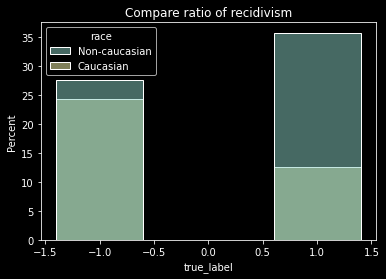

In [7]:
ax = sns.histplot(data=df_compas, x="true_label", stat="percent", hue="race", discrete=True, shrink=0.8)
ax.set_title('Compare ratio of recidivism')
ax.set_ylabel('Percent')
plt.show()

Disparate impact on original dataset between sensitve groups of race 0.6011637964928835


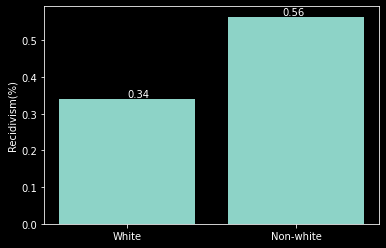

In [64]:
per_white= ( (df_compas.loc[:,"race"]=="Caucasian") & (df_compas.loc[:,"true_label"]==1) ).sum()/(df_compas.loc[:,"race"]=="Caucasian").sum() # Positive prediction rate for the white
per_black=( (df_compas.loc[:,"race"]=="Non-caucasian") & (df_compas.loc[:,"true_label"]==1) ).sum()/(df_compas.loc[:,"race"]=="Non-caucasian").sum() # Positive prediction rate for the non-white

plt.bar(x=["White", "Non-white"], height=[per_white, per_black])
plt.ylabel("Recidivism(%)")

print("Disparate impact on original dataset between sensitve groups of race", min(per_white/per_black, per_black/per_white))
for x,per in [(0,per_white), (0.92, per_black)]:
    plt.text(x,per+0.005, str(round(per,2)))

# print(per_white, per_black)

Disparate impact on original dataset between sensitve groups male and female 0.8796764408493427


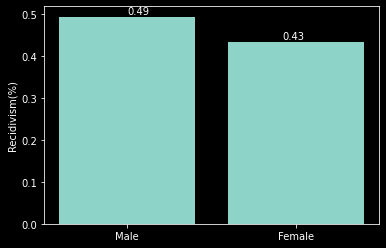

In [61]:
per_males= ( (df_compas.loc[:,"gender"]=="Male") & (df_compas.loc[:,"true_label"]==1) ).sum()/(df_compas.loc[:,"gender"]=="Male").sum() # Positive prediction rate for male
per_females=( (df_compas.loc[:,"gender"]=="Female") & (df_compas.loc[:,"true_label"]==1) ).sum()/(df_compas.loc[:,"gender"]=="Female").sum() # Positive prediction rate for female

plt.bar(x=["Male", "Female"], height=[per_males, per_females])
plt.ylabel("Recidivism(%)")

print("Disparate impact on original dataset between sensitve groups male and female", min(per_males/per_females, per_females/per_males))

for x,per in [(0,per_males), (0.92, per_females)]:
    plt.text(x,per+0.005, str(round(per,2)))

In [48]:
# Encoding for categorial feature

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

enc = OrdinalEncoder()
cat_feat_train = ["crime_level", "gender"]
X_feat_encoded = enc.fit_transform(df_compas[cat_feat_train])
# print(df_compas[cat_feat_train][:10], pd.DataFrame(X_feat_encoded[:10]))

num_feat_train = ['age', 'num_of_crimes']
X_num = np.array(df_compas[num_feat_train])

X = np.concatenate((X_feat_encoded, X_num), axis=1)

y = np.array(df_compas['true_label'])

s1 = np.array(LabelEncoder().fit_transform(df_compas['race'])) # Choose race as Sensitive features


print(df_compas['race'][:10], pd.DataFrame(s1[:10]))


# Scale dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_std = scaler.fit_transform(X)

0    Non-caucasian
1    Non-caucasian
2    Non-caucasian
3    Non-caucasian
4    Non-caucasian
5        Caucasian
6    Non-caucasian
7    Non-caucasian
8    Non-caucasian
9    Non-caucasian
Name: race, dtype: object    0
0  1
1  1
2  1
3  1
4  1
5  0
6  1
7  1
8  1
9  1


In [ ]:
## Check quality of crowdsourced labels,